The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


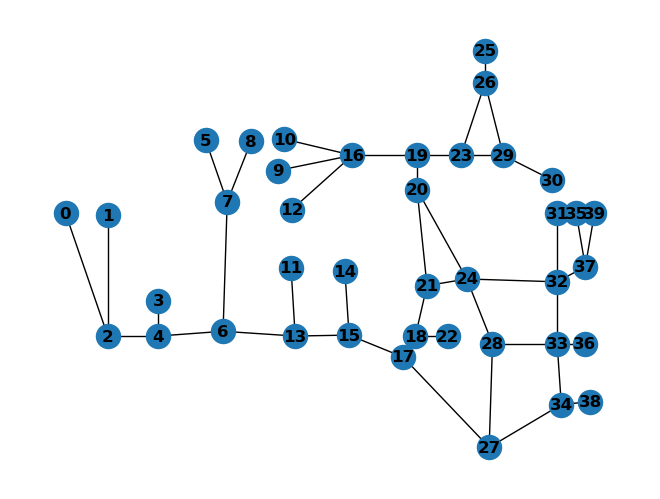

In [2]:
%load_ext autoreload
%autoreload, 2
from PatrolGraph import PatrolGraph
import matplotlib.pyplot as plt
import networkx as nx

graph = PatrolGraph("/home/anthony/dev/patrolling_sim/src/patrolling_sim/models/maps/cumberland/cumberland.graph")

# subax1 = plt.subplot(121)
pos = nx.get_node_attributes(graph.graph,'pos')
nx.draw(graph.graph, pos, with_labels=True, font_weight='bold')
# subax2 = plt.subplot(122)

# nx.draw_shell(graph.graph, pos, nlist=[range(5, 10), range(5)], with_labels=True, font_weight='bold')
plt.show()

In [3]:
paths = dict(nx.all_pairs_shortest_path(graph.graph))

start = 0
end = 1
print(f"Path from {start} to {end} with cost {nx.path_weight(graph.graph, paths[start][end], 'weight')}: {paths[start][end]}")

Path from 0 to 1 with cost 304: [0, 2, 1]


In [8]:
initialPoses = [38.625, 16.5, 47.175, 6.6, 46.0, 24.5, 2.325, 21.675, 21.525, 25.05, 23.1, 12.0]
# initialPoses = [38.625, 16.5, 26.25, 18.525, 46.0, 24.5, 2.325, 21.675, 21.525, 25.05, 23.1, 12.0]
origins = graph.getOriginsFromInitialPoses(initialPoses)
print(f"Origins: {origins}")

print(graph.graph.nodes[14]["pos"])
print(graph.graph.nodes[34]["pos"])

voronoi = nx.algorithms.voronoi.voronoi_cells(graph.graph, origins)
print(voronoi)

Origins: [24, 14, 30, 0, 9, 13]
(27.599999999999998, 17.099999999999998)
(47.175, 6.6)
{24: {32, 33, 34, 35, 36, 37, 38, 39, 17, 18, 19, 20, 21, 22, 24, 27, 28, 31}, 14: {14}, 30: {23, 25, 26, 29, 30}, 0: {0, 1, 2}, 9: {16, 9, 10, 12}, 13: {3, 4, 5, 6, 7, 8, 11, 13, 15}}


In [5]:
import configparser
def loadInitPoses(configFile):
    ''' Load initial poses from configuration file. '''
    initPoses = {}
    try:
        ConfigIP = configparser.ConfigParser()
        ConfigIP.read(configFile)
        for option in ConfigIP.options("InitialPoses"):
            # print(option)
            initPoses[option] = ConfigIP.get("InitialPoses", option)
    except:
        print("Could not load initial poses file")
    return initPoses

initPoses = loadInitPoses("/home/anthony/idev/patrolling_sim/src/patrolling_sim/config/initial_poses.txt")

Could not load initial poses file
